# SVM - Classification
here i will use SVM to classify two sets of data. here we will make use of the SVM algorithm from sklearn library


In [1]:
#Load Modules
from pandas import read_csv
import pandas as pd
from time import sleep
from numpy import ones, zeros, append, linspace, reshape, mean ,std, sum, array, dot,concatenate, split, trace
from numpy.random import rand
from pylab import plot, scatter, xlabel, ylabel, contour,figure, show, axes, imshow
from scipy.optimize import fmin_bfgs, fmin_cg
from sklearn.svm import SVC
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Here we import the images which are separated in a gray scale intensity in a 20x20 array
import scipy.io
dataA = scipy.io.loadmat('data/data5a.mat')
data = append(dataA['X'],dataA['y'],axis=1) 

print 'We observed the first 5 examples'
print data[:5]

We observed the first 5 examples
[[ 1.9643  4.5957  1.    ]
 [ 2.2753  3.8589  1.    ]
 [ 2.9781  4.5651  1.    ]
 [ 2.932   3.5519  1.    ]
 [ 3.5772  2.856   1.    ]]


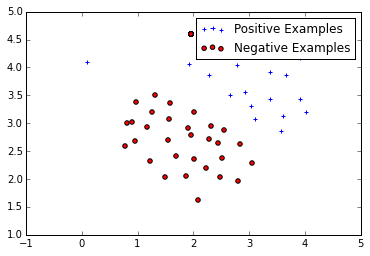

In [3]:
#Pass the data into a matrix and plot it
x = dataA['X']
y = dataA['y']
pos = where(y == 1)
neg = where(y == 0)

scatter(x[pos,0],x[pos,1], marker = '+', c='b')
scatter(x[neg,0],x[neg,1], marker = 'o', c='r')
legend(['Positive Examples','Negative Examples'])

In [4]:
#This function aplies SVC and plots the required boarder line
#I must say that this specific code has minor changes with one I founf in the sklearn repositories

def fitAndPlot(c, ker,x,y):
    if kernel == 'rbf':
        clf = SVC()
    else:
        clf = SVC(kernel=ker, C = c)
    y.shape = (y.shape[0],)
    clf.fit(x,y)
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0,5)
    yy = a * xx - clf.intercept_[0] / w[1]
    h0 = plt.plot(xx, yy, 'k-', label="non weighted div")
    scatter(x[pos,0],x[pos,1], marker = '+', c='b')
    scatter(x[neg,0],x[neg,1], marker = 'o', c='r')
    legend(['Positive Examples','Negative Examples'])

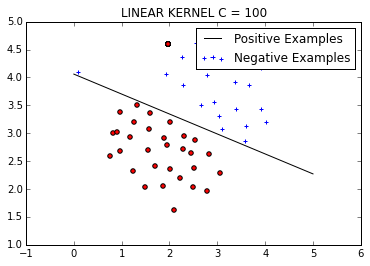

We observe that for C big it tries to get all the examples in one side and the other, using the closest ones to the line as support vectors
With big C we end up in a High Variance situation
A more relaxed C fits more appropietly


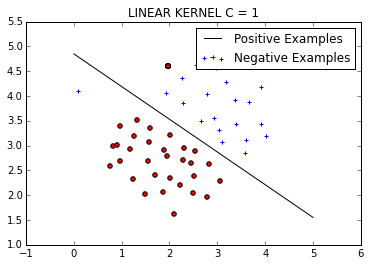

In [5]:
#Here we use a linear Kernel and observe the influence of C
kernel = 'linear'
C=100
fitAndPlot(C,kernel,x,y)
title('LINEAR KERNEL C = %d'%C)
show()
C = 1
fitAndPlot(C,kernel,x,y)
title('LINEAR KERNEL C = %d'%C)

print 'We observe that for C big it tries to get all the examples in one side and the other, using the closest ones to the line as support vectors'
print 'With big C we end up in a High Variance situation'
print 'A more relaxed C fits more appropietly'

# Second Data

In [6]:
#I will now separate a far more complicated data set using SVM
import scipy.io
dataA = scipy.io.loadmat('data/data5b.mat')
data = append(dataA['X'],dataA['y'],axis=1) 

print data[:5]

x = dataA['X']
y = dataA['y']

[[ 0.107143   0.60307    1.       ]
 [ 0.093318   0.649854   1.       ]
 [ 0.0979263  0.705409   1.       ]
 [ 0.15553    0.784357   1.       ]
 [ 0.210829   0.866228   1.       ]]


Examples are not easily separated we need to use a non-linear Kernel


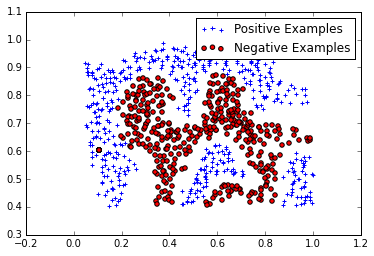

In [7]:
#Plot Data
pos = where(y == 1)
neg = where(y == 0)

scatter(x[pos,0],x[pos,1], marker = '+', c='b')
scatter(x[neg,0],x[neg,1], marker = 'o', c='r')
legend(['Positive Examples','Negative Examples'])

print 'Examples are not easily separated we need to use a non-linear Kernel'

Here a Radius Basis Function "RBF" kernel was used. The parameter Gamma gives a measure of to what degree the shape can be loose from a circle
A low Gamma means very circular and a high gama quite loose shape.
Here we use Gamma = 100. Try moving gamma around to see different shapes
The accuracy of the algorithm is 99.768250%


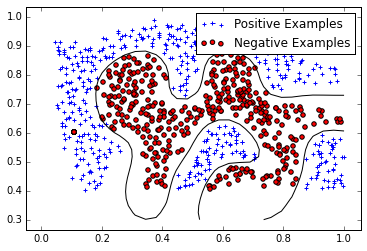

In [8]:
#This function has minor changes from the one given in the sklearn repositories
def boarderCurve(clf, ax=None):
    if ax is None:
        ax = plt.gca()
    x = linspace(0,1, 30)
    y = linspace(.3,1, 30)
    Y, X = meshgrid(y, x)
    P = zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X,Y, P,levels=[0], colors='k',linestyles=['-'])


gam = 100
clf = SVC(kernel='rbf', gamma = gam)
clf.fit(x, y.flatten())

scatter(x[pos,0],x[pos,1], marker = '+', c='b')
scatter(x[neg,0],x[neg,1], marker = 'o', c='r')
legend(['Positive Examples','Negative Examples'])
boarderCurve(clf)

acc = clf.score(x,y)*100

print 'Here a Radius Basis Function "RBF" kernel was used. The parameter Gamma gives a measure of to what degree the shape can be loose from a circle'
print 'A low Gamma means very circular and a high gama quite loose shape.'
print 'Here we use Gamma = %d. Try moving gamma around to see different shapes'%gam
print 'The accuracy of the algorithm is %f%%'%acc